**청구액 이상치 데이터 제거후     재확인**



In [ ]:
import pandas as pd

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/sample_data/final_credit_clean.csv')

# 2️⃣ 청구 금액 컬럼
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3',
             'BILL_AMT4','BILL_AMT5','BILL_AMT6']

# 3️⃣ 음수 청구 금액이 있는 고객 ID 추출
neg_customers = df[df[bill_cols].lt(0).any(axis=1)]['ID'].unique()

# 4️⃣ 해당 고객 ID 전체 제거
df_clean = df[~df['ID'].isin(neg_customers)]

# 5️⃣ 저장
df_clean.to_csv('/content/clean_removed_negative_customers.csv', index=False)

print("음수 청구금액 가진 고객 ID 제거 완료!")
print(f"제거된 고객 수: {len(neg_customers)}명")


음수 청구금액 가진 고객 ID 제거 완료!
제거된 고객 수: 0명


**결혼 여부 전처리**
- '기타'에 해당하는 고객들의 신용 불이행률이 '기혼'이나 '미혼' 카테고리에 해당하는 고객들보다 높은 신용 불이행률을 가진다. 이는 '기타' 카테고리가 매유 유의미한 해석 결과를 가져올 수 있기 때문에 삭제하지 않고 그대로 둔다. 그러나 '0'에 해당하는 '알 수 없음'의 카테고리에 해당하는 고객들은 매우 낮은 신용 불이행률을 가지기 때문에 무의미하다. 따라서 '0'카테고리는 삭제한다.

In [ ]:
import pandas as pd

# 1. 데이터 불러오기 (예시)
df = pd.read_csv('/content/sample_data/final_credit_clean.csv')

print(f"--- 원본 데이터 ---")
print(f"처리 전 데이터 행 수: {len(df)}")
print(f"원본 MARRIAGE 고유값: {sorted(df['MARRIAGE'].unique())}")
print("-" * 30)


# 2. MARRIAGE (결혼 여부) 전처리
# (데이터가 54건으로 매우 적고 노이즈가 될 수 있는 0 그룹 삭제)
print("\n--- MARRIAGE 전처리 (0 그룹 삭제) ---")

# 0인 그룹의 개수를 셉니다.
count_to_remove = len(df[df['MARRIAGE'] == 0])
print(f"(참고: MARRIAGE '0' 그룹 {count_to_remove}건 삭제 예정)")

# 0이 아닌 행만 남깁니다.
df = df[df['MARRIAGE'] != 0]

print(f"처리 후 데이터 행 수: {len(df)}")
print(f"처리 후 MARRIAGE 고유값: {sorted(df['MARRIAGE'].unique())}")
print("-" * 30)

--- 원본 데이터 ---
처리 전 데이터 행 수: 28056
원본 MARRIAGE 고유값: [np.int64(0), np.int64(1)]
------------------------------

--- MARRIAGE 전처리 (0 그룹 삭제) ---
(참고: MARRIAGE '0' 그룹 15287건 삭제 예정)
처리 후 데이터 행 수: 12769
처리 후 MARRIAGE 고유값: [np.int64(1)]
------------------------------


In [ ]:
import pandas as pd

# 1. 원본 파일 불러오기
# (이 스크립트와 'final_credit_clean.csv' 파일이 같은 폴더에 있어야 합니다)
try:
    df = pd.read_csv('/content/sample_data/marriage_preprocessed_data.csv')
    print(f"--- 원본 데이터 ---")
    print(f"처리 전 데이터 행 수: {len(df)}")
    print(f"원본 MARRIAGE 고유값: {sorted(df['MARRIAGE'].unique())}")
    print("-" * 30)

    # 2. MARRIAGE (결혼 여부) 전처리
    # 0인 그룹의 개수를 셉니다.
    count_to_remove = len(df[df['MARRIAGE'] == 0])
    print(f"\n--- MARRIAGE 전처리 (0 그룹 삭제) ---")
    print(f"(MARRIAGE '0' 그룹 {count_to_remove}건 삭제 예정)")

    # 0이 아닌 행만 남깁니다.
    df_processed = df[df['MARRIAGE'] != 0].copy()

    print(f"처리 후 데이터 행 수: {len(df_processed)}")
    print(f"처리 후 MARRIAGE 고유값: {sorted(df_processed['MARRIAGE'].unique())}")
    print("-" * 30)

    # 3. 새로운 CSV 파일로 저장
    new_filename = 'marriage_preprocessed_data.csv'

    # index=False: 불필요한 인덱스 열이 저장되지 않도록 합니다.
    # encoding='utf-8-sig': Excel에서 한글이 깨지지 않게 엽니다.
    df_processed.to_csv(new_filename, index=False, encoding='utf-8-sig')

    print(f"\n✅ 완료: '{new_filename}' 파일이 성공적으로 저장되었습니다.")

except FileNotFoundError:
    print(f"오류: 'final_credit_clean.csv' 파일을 찾을 수 없습니다.")
except Exception as e:
    print(f"오류 발생: {e}")

오류: 'final_credit_clean.csv' 파일을 찾을 수 없습니다.


단일 변수 분석 - 주요 변수(신용한도, 나이, 성별, 학력) 분포 파악

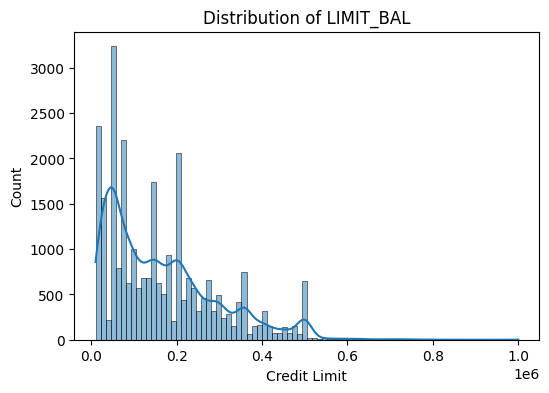

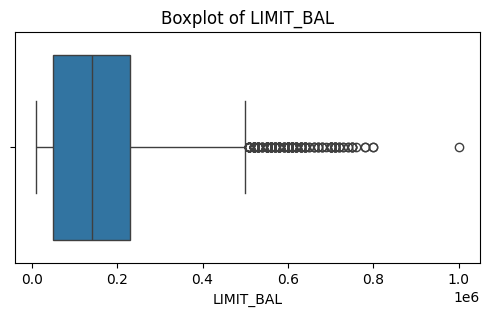

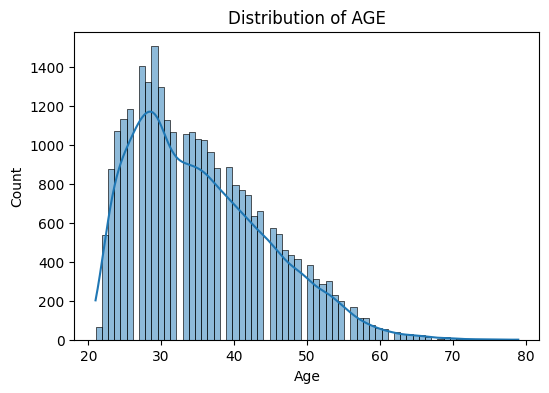

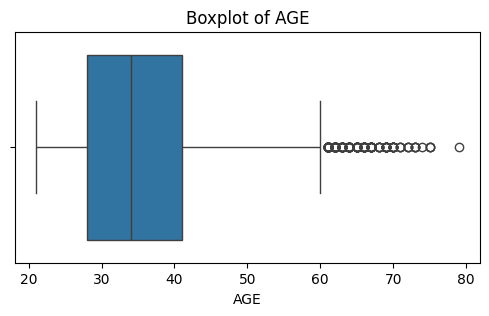

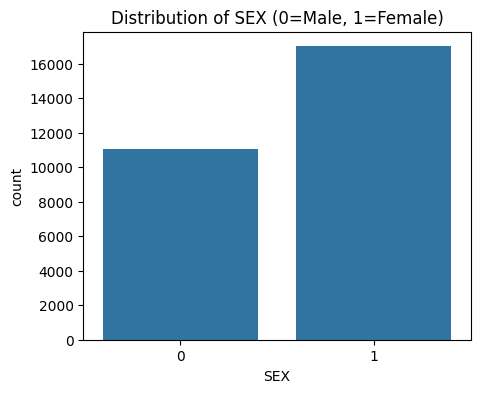

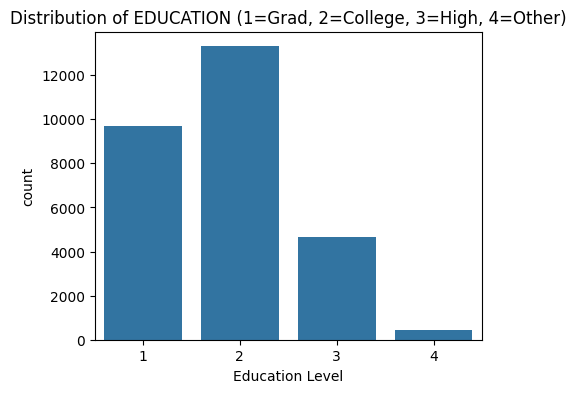

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 깨짐 방지(영문 사용 원하면 제거 가능)
plt.rcParams['font.family'] = 'DejaVu Sans'

# 데이터 불러오기
df = pd.read_csv('/content/sample_data/final_credit_clean.csv')

# ===== 1. 신용한도 (LIMIT_BAL) =====
plt.figure(figsize=(6,4))
sns.histplot(df['LIMIT_BAL'], kde=True)
plt.title('Distribution of LIMIT_BAL')
plt.xlabel('Credit Limit')
plt.show()

plt.figure(figsize=(6,3))
sns.boxplot(x=df['LIMIT_BAL'])
plt.title('Boxplot of LIMIT_BAL')
plt.show()

# ===== 2. 나이 (AGE) =====
plt.figure(figsize=(6,4))
sns.histplot(df['AGE'], kde=True)
plt.title('Distribution of AGE')
plt.xlabel('Age')
plt.show()

plt.figure(figsize=(6,3))
sns.boxplot(x=df['AGE'])
plt.title('Boxplot of AGE')
plt.show()

# ===== 3. 성별 (SEX) =====
plt.figure(figsize=(5,4))
sns.countplot(x=df['SEX'])
plt.title('Distribution of SEX (0=Male, 1=Female)')
plt.xlabel('SEX')
plt.show()

# ===== 4. 학력 (EDUCATION) =====
plt.figure(figsize=(5,4))
sns.countplot(x=df['EDUCATION'])
plt.title('Distribution of EDUCATION (1=Grad, 2=College, 3=High, 4=Other)')
plt.xlabel('Education Level')
plt.show()


목표 변수 분포 - 연체/비연체 비율 확인

=== 📌 연체 여부 분포 (Count) ===
default payment next month
0    21738
1     6318
Name: count, dtype: int64

=== 📌 연체 여부 분포 (Percentage) ===
default payment next month
0    77.480753
1    22.519247
Name: proportion, dtype: float64


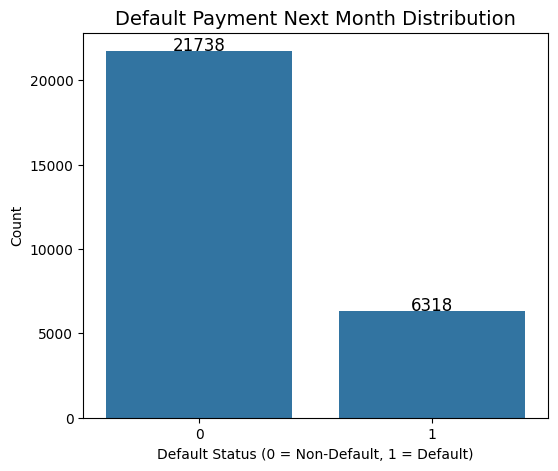

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/sample_data/final_credit_clean.csv')

# 2️⃣ 타깃 변수명 지정
target = 'default payment next month'   # 0=비연체, 1=연체

# 3️⃣ 빈도와 비율 출력
print("=== 📌 연체 여부 분포 (Count) ===")
print(df[target].value_counts())

print("\n=== 📌 연체 여부 분포 (Percentage) ===")
print(df[target].value_counts(normalize=True) * 100)

# 4️⃣ 시각화
plt.figure(figsize=(6,5))
sns.countplot(x=target, data=df)
plt.title('Default Payment Next Month Distribution', fontsize=14)
plt.xlabel('Default Status (0 = Non-Default, 1 = Default)')
plt.ylabel('Count')

# 막대 위 숫자 표시
counts = df[target].value_counts()
for i, v in enumerate(counts):
    plt.text(i, v + 50, str(v), ha='center', fontsize=12)

plt.show()


범주형 변수와 연체율 관계 - 범주별(성별, 학력, 결혼 상대)로 연체율이 어떻게 다른지 비교

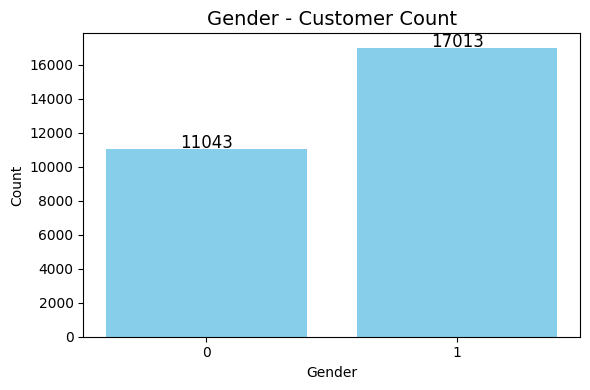

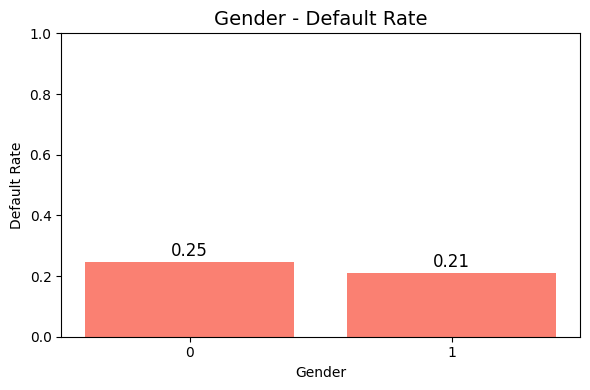

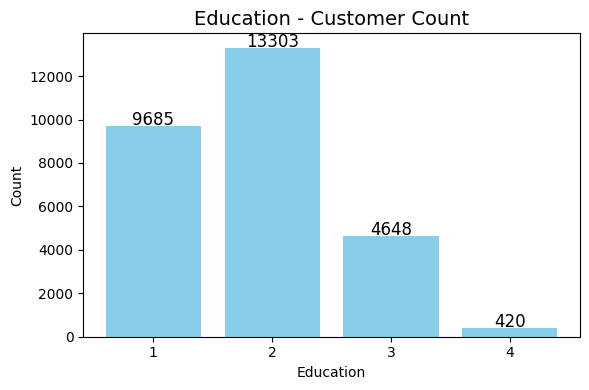

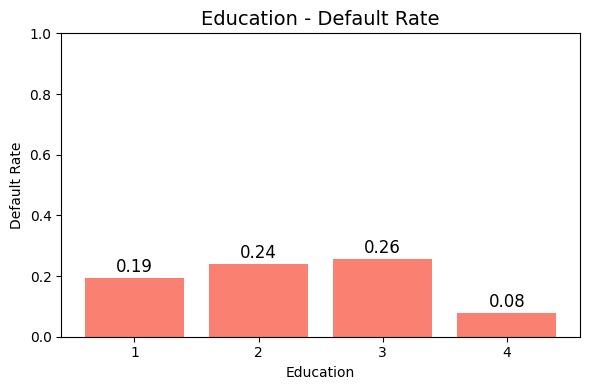

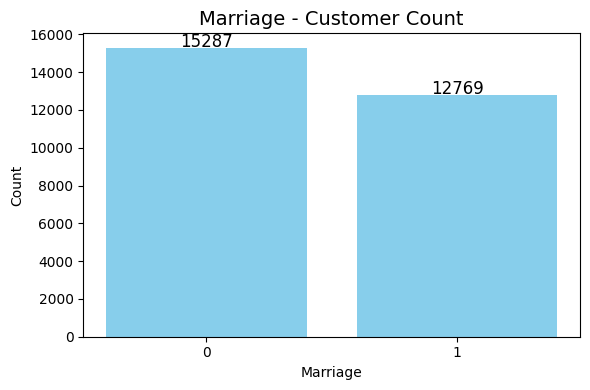

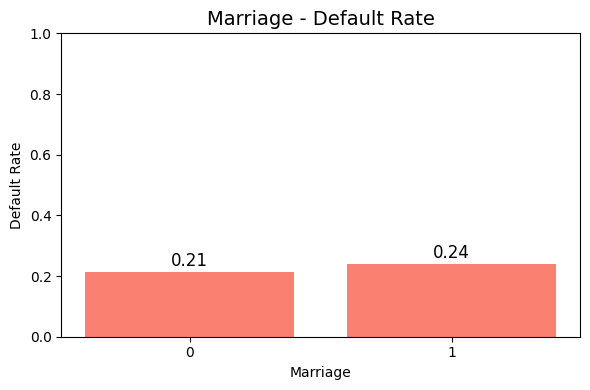

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('/content/sample_data/final_credit_clean.csv')

# 컬럼 영어로 변경 (연체 여부 컬럼명도 맞춰줌)
df_plot = df.rename(columns={
    'SEX': 'Gender',
    'EDUCATION': 'Education',
    'MARRIAGE': 'Marriage',
    'default payment next month': 'DefaultNextMonth'
})

# 범주형 변수 리스트
categorical_cols = ['Gender', 'Education', 'Marriage']

# -----------------------------
# 범주형 변수별 연체율 시각화 함수
# -----------------------------
def plot_default_rate_one(df, col_name, color_count='skyblue', color_rate='salmon'):
    """
    col_name: 범주형 변수 이름 (예: 'Gender', 'Education', 'Marriage')
    """
    count_data = df[col_name].value_counts().sort_index()
    default_rate = df.groupby(col_name)['DefaultNextMonth'].mean().sort_index()

    # 고객 수 그래프
    plt.figure(figsize=(6, 4))
    bars = plt.bar(count_data.index.astype(str), count_data.values, color=color_count)
    plt.title(f"{col_name} - Customer Count", fontsize=14)
    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+50, int(bar.get_height()), ha='center', fontsize=12)
    plt.tight_layout()
    plt.show()

    # 연체율 그래프
    plt.figure(figsize=(6, 4))
    bars = plt.bar(default_rate.index.astype(str), default_rate.values, color=color_rate)
    plt.title(f"{col_name} - Default Rate", fontsize=14)
    plt.xlabel(col_name)
    plt.ylabel("Default Rate")
    plt.ylim(0, 1)
    plt.xticks(rotation=0)
    for bar, rate in zip(bars, default_rate.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.02, f"{rate:.2f}", ha='center', fontsize=12)
    plt.tight_layout()
    plt.show()

# -----------------------------
# 모든 범주형 변수 반복 실행
# -----------------------------
for col in categorical_cols:
    plot_default_rate_one(df_plot, col)


수치형 변수와 연체율 관계 - 신용한도, 나이 등에 따른 연체 그룹 분포 비교

-기본 수치형 변수
1. 수치형 변수별 연체 그룹 평균 비교 표

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/sample_data/final_credit_clean.csv')

# 2️⃣ 분석할 수치형 변수
numeric_vars = ['LIMIT_BAL', 'AGE']   # 필요하면 더 추가해도 됨
target = 'default payment next month'

# 3️⃣ 수치형 변수별 연체 여부에 따른 평균 비교
print("=== 📌 연체 여부에 따른 수치형 변수 평균 비교 ===")
display(df.groupby(target)[numeric_vars].mean())


=== 📌 연체 여부에 따른 수치형 변수 평균 비교 ===


,LIMIT_BAL,AGE
default payment next month,,
0,175296.807434,35.389732
1,126984.438113,35.651472


2. 박스플롯(수치형 변수 vs 연체여부)

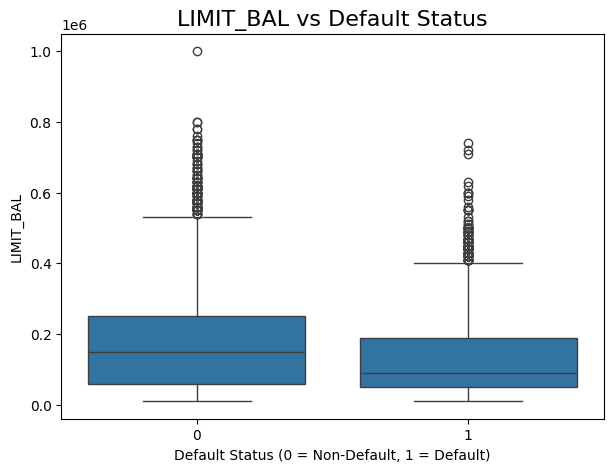

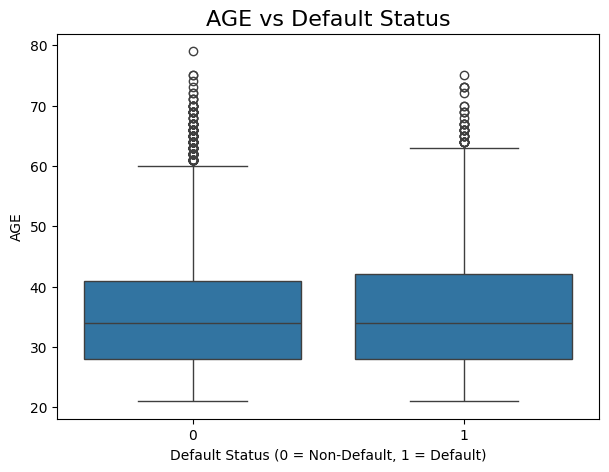

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/sample_data/final_credit_clean.csv')

# 2️⃣ 수치형 변수 리스트
numeric_vars = ['LIMIT_BAL', 'AGE']

# 3️⃣ 타깃 변수명
target = 'default payment next month'   # 0 = Non-default, 1 = Default

# 4️⃣ 박스플롯 생성
for col in numeric_vars:
    plt.figure(figsize=(7,5))
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f'{col} vs Default Status', fontsize=16)
    plt.xlabel('Default Status (0 = Non-Default, 1 = Default)')
    plt.ylabel(col)
    plt.show()


3. 히스토그램 분포 비교(KDE 포함)

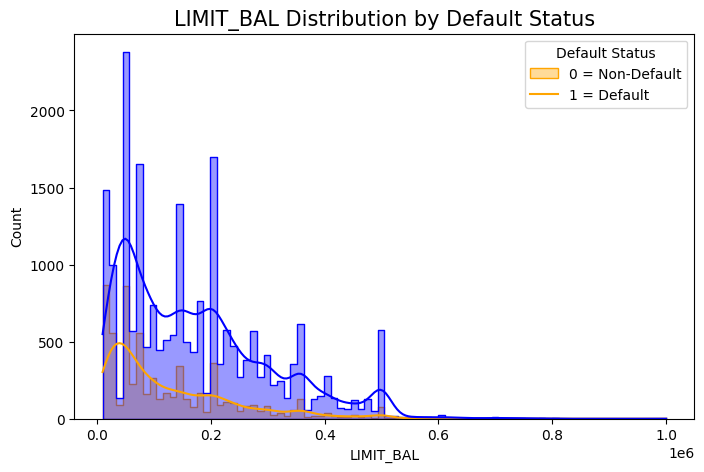

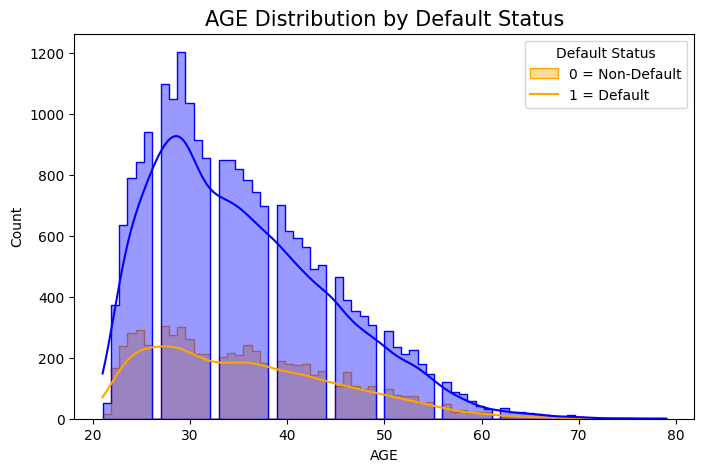

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/sample_data/final_credit_clean.csv')

# 2️⃣ 분석할 수치형 변수 목록
numeric_vars = ['LIMIT_BAL', 'AGE']
target = 'default payment next month'

# 3️⃣ 히스토그램 + KDE + 커스텀 범례
for col in numeric_vars:
    plt.figure(figsize=(8,5))

    sns.histplot(
        data=df, x=col, hue=target,
        kde=True, palette={0:'blue', 1:'orange'},
        alpha=0.4, element='step'
    )

    # 🔥 커스텀 라벨로 범례 변경
    plt.legend(
        title="Default Status",
        labels=["0 = Non-Default", "1 = Default"]
    )

    plt.title(f'{col} Distribution by Default Status', fontsize=15)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


4. 수치형 변수별 연체율 계산(고급 분석)

/tmp/ipython-input-4148441520.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate = df.groupby(f'{col}_bin')[target].mean() * 100



📌 LIMIT_BAL 구간별 연체율 (%)
LIMIT_BAL_bin
(9999.999, 50000.0]      32.221318
(50000.0, 140000.0]      24.852234
(140000.0, 230000.0]     17.667027
(230000.0, 1000000.0]    14.279526
Name: default payment next month, dtype: float64


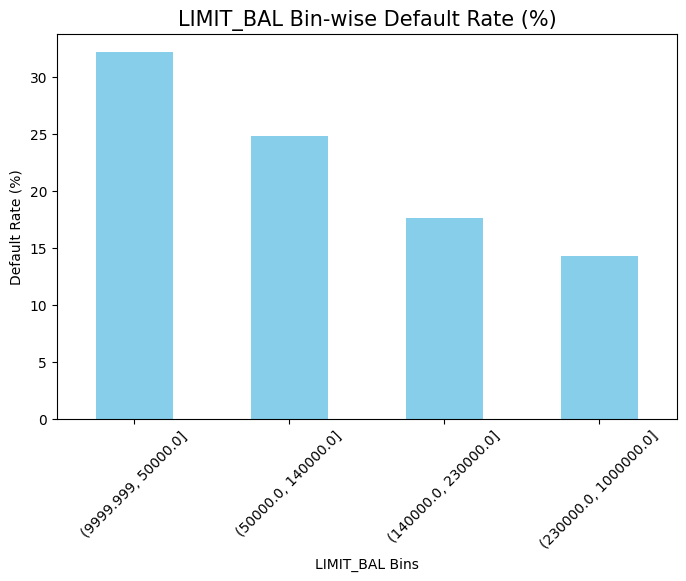


📌 AGE 구간별 연체율 (%)
AGE_bin
(20.999, 28.0]    23.881579
(28.0, 34.0]      19.823108
(34.0, 41.0]      22.016040
(41.0, 79.0]      24.247204
Name: default payment next month, dtype: float64


/tmp/ipython-input-4148441520.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate = df.groupby(f'{col}_bin')[target].mean() * 100


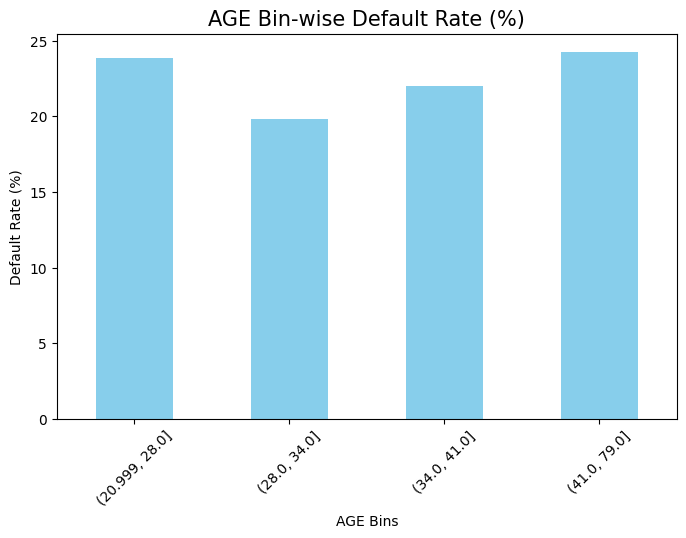

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/sample_data/final_credit_clean.csv')

# 2️⃣ 분석할 변수들 (원하는 만큼 추가 가능)
numeric_vars = ['LIMIT_BAL', 'AGE']
target = 'default payment next month'

# 3️⃣ 수치형 변수별 연체율 계산 + 시각화
for col in numeric_vars:

    # 🔹 분위수 기반 구간 나누기 (4개 구간: 25% 단위)
    df[f'{col}_bin'] = pd.qcut(df[col], q=4, duplicates='drop')

    # 🔹 구간별 연체율 계산 (%)
    default_rate = df.groupby(f'{col}_bin')[target].mean() * 100

    print(f"\n==============================")
    print(f"📌 {col} 구간별 연체율 (%)")
    print("==============================")
    print(default_rate)

    # 🔹 시각화
    plt.figure(figsize=(8,5))
    default_rate.plot(kind='bar', color='skyblue')
    plt.title(f'{col} Bin-wise Default Rate (%)', fontsize=15)
    plt.ylabel('Default Rate (%)')
    plt.xlabel(f'{col} Bins')
    plt.xticks(rotation=45)
    plt.show()


BILL_AMT1~6(청구금액 6개) 히스토그램 + KDE (연체 여부 비교)

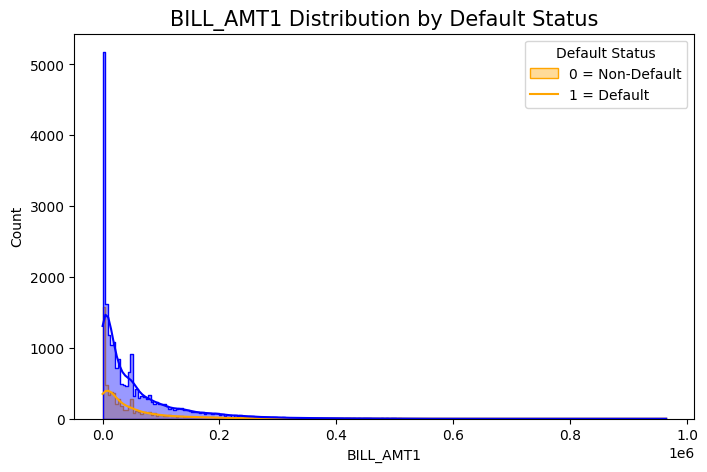

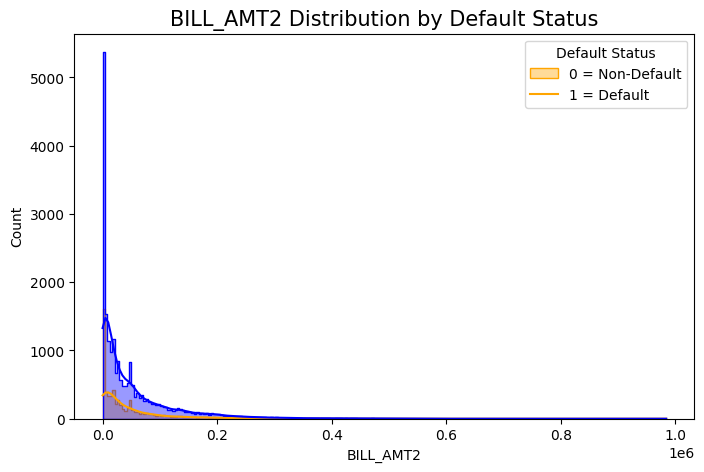

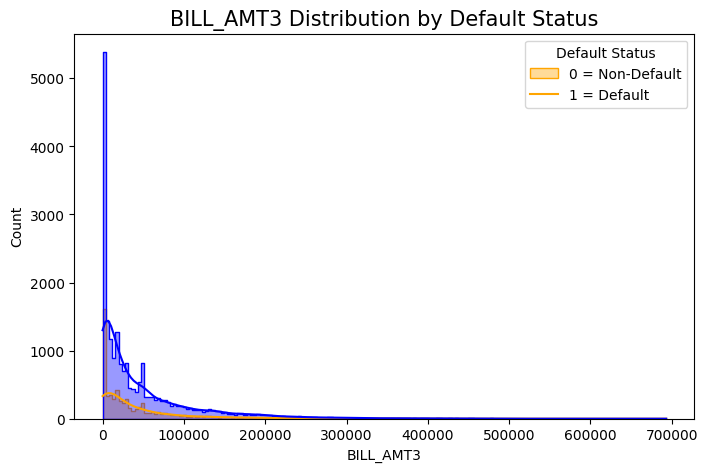

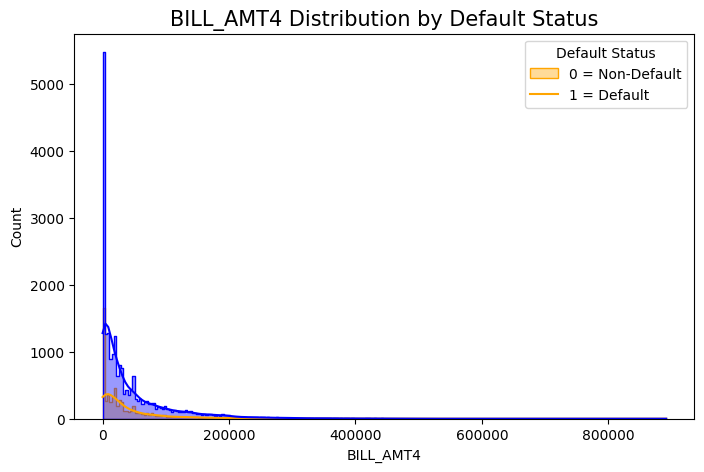

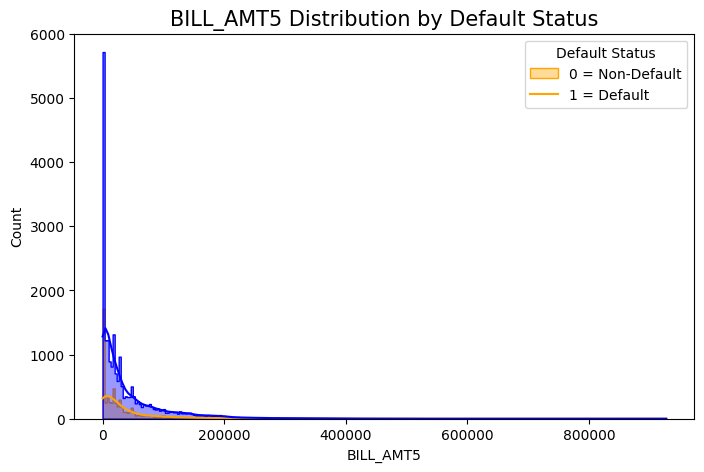

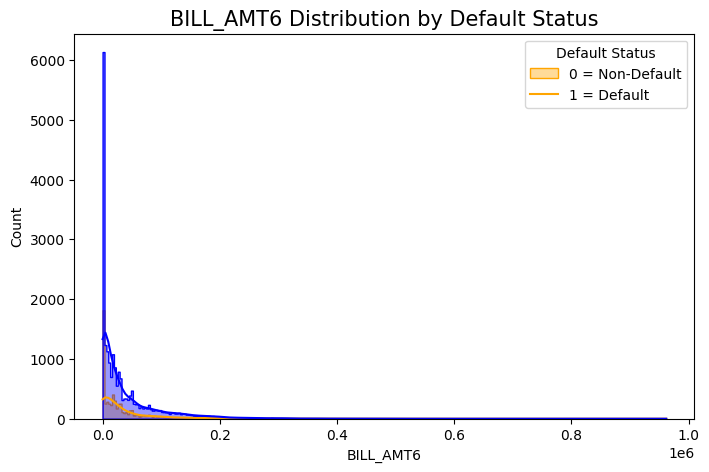

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/sample_data/final_credit_clean.csv')

# 2️⃣ BILL_AMT 변수 목록
bill_vars = [f'BILL_AMT{i}' for i in range(1, 7)]
target = 'default payment next month'

# 3️⃣ BILL_AMT1~6 히스토그램 + KDE
for col in bill_vars:
    plt.figure(figsize=(8,5))
    sns.histplot(
        data=df, x=col, hue=target,
        kde=True, palette={0:'blue', 1:'orange'},
        alpha=0.4, element='step'
    )

    plt.legend(
        title="Default Status",
        labels=["0 = Non-Default", "1 = Default"]
    )

    plt.title(f'{col} Distribution by Default Status', fontsize=15)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


BILL_AMT1~6(청구금액 6개) 구간별 연체율(bin-wise default rate)→ 청구금액이 어느 정도일 때 연체 위험이 높은지 분석





=== BILL_AMT1 구간별 연체율(%) ===
BILL_AMT1_bin
(-0.001, 4811.5]       23.339036
(4811.5, 25430.0]      23.809524
(25430.0, 70596.5]     22.711719
(70596.5, 964511.0]    20.216709
Name: default payment next month, dtype: float64


/tmp/ipython-input-2880346392.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(f'{col}_bin')[target].mean() * 100


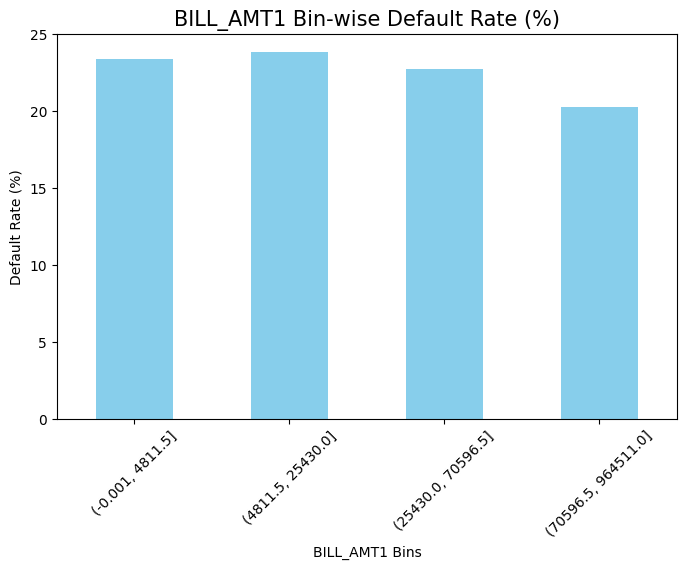

/tmp/ipython-input-2880346392.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(f'{col}_bin')[target].mean() * 100



=== BILL_AMT2 구간별 연체율(%) ===
BILL_AMT2_bin
(-0.001, 4245.75]       23.082407
(4245.75, 24468.0]      23.467351
(24468.0, 68053.75]     23.025378
(68053.75, 983931.0]    20.501853
Name: default payment next month, dtype: float64


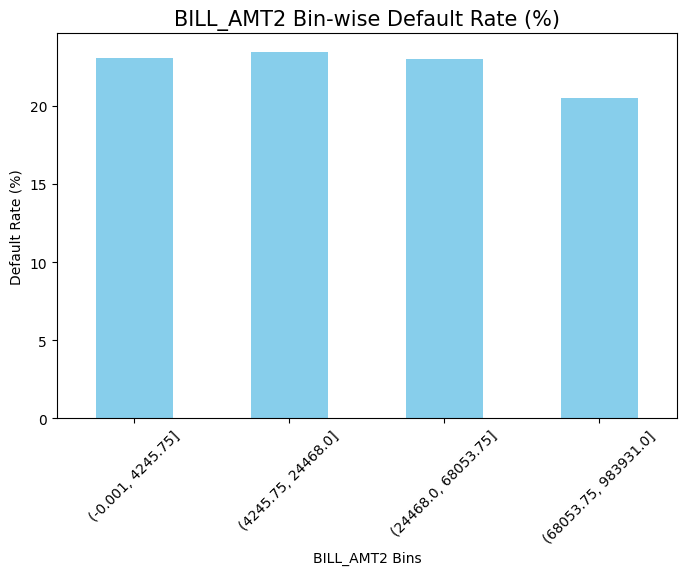

/tmp/ipython-input-2880346392.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(f'{col}_bin')[target].mean() * 100



=== BILL_AMT3 구간별 연체율(%) ===
BILL_AMT3_bin
(-0.001, 3977.0]       22.993585
(3977.0, 22637.5]      23.085698
(22637.5, 63984.0]     23.552894
(63984.0, 693131.0]    20.444825
Name: default payment next month, dtype: float64


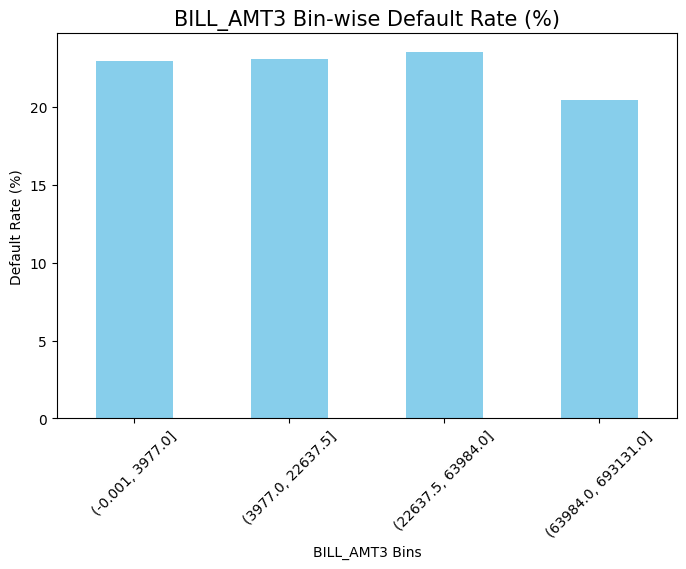

/tmp/ipython-input-2880346392.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(f'{col}_bin')[target].mean() * 100



=== BILL_AMT4 구간별 연체율(%) ===
BILL_AMT4_bin
(-0.001, 3390.75]       23.253493
(3390.75, 20239.5]      22.540633
(20239.5, 58245.25]     23.595666
(58245.25, 891586.0]    20.687197
Name: default payment next month, dtype: float64


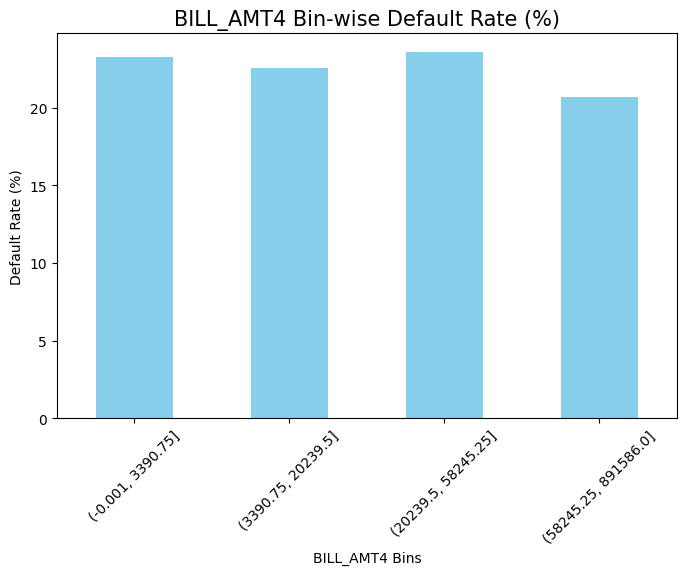

/tmp/ipython-input-2880346392.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(f'{col}_bin')[target].mean() * 100



=== BILL_AMT5 구간별 연체율(%) ===
BILL_AMT5_bin
(-0.001, 2634.0]        23.492516
(2634.0, 19305.5]       21.602738
(19305.5, 53069.75]     24.522384
(53069.75, 927171.0]    20.459082
Name: default payment next month, dtype: float64


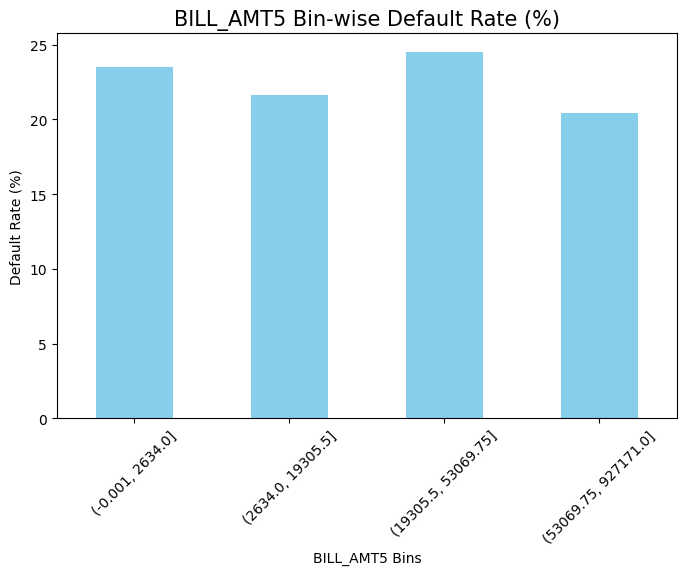

/tmp/ipython-input-2880346392.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(f'{col}_bin')[target].mean() * 100



=== BILL_AMT6 구간별 연체율(%) ===
BILL_AMT6_bin
(-0.001, 1972.25]      22.968349
(1972.25, 18732.0]     21.479475
(18732.0, 51106.0]     24.982176
(51106.0, 961664.0]    20.647369
Name: default payment next month, dtype: float64


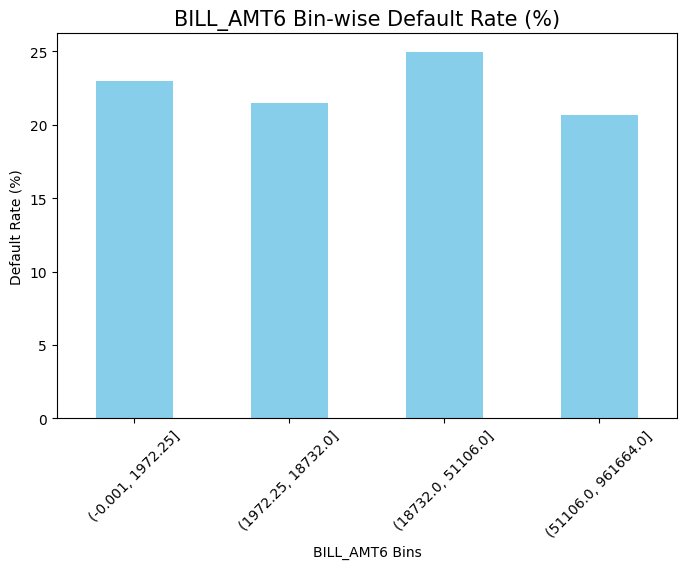

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/sample_data/final_credit_clean.csv')

# 2️⃣ BILL_AMT 변수 목록
bill_vars = [f'BILL_AMT{i}' for i in range(1, 7)]
target = 'default payment next month'

# 3️⃣ 변수별 연체율(bin-wise default rate)
for col in bill_vars:

    # 분위수 기반 구간 나누기 (4구간)
    df[f'{col}_bin'] = pd.qcut(df[col], q=4, duplicates='drop')

    # 구간별 연체율(%)
    rate = df.groupby(f'{col}_bin')[target].mean() * 100

    print(f"\n=== {col} 구간별 연체율(%) ===")
    print(rate)

    # 시각화
    plt.figure(figsize=(8,5))
    rate.plot(kind='bar', color='skyblue')
    plt.title(f'{col} Bin-wise Default Rate (%)', fontsize=15)
    plt.ylabel('Default Rate (%)')
    plt.xlabel(f'{col} Bins')
    plt.xticks(rotation=45)
    plt.show()


PAY_AMT1~6(지불금액 6개) 히스토그램 + KDE (연체 여부 비교)

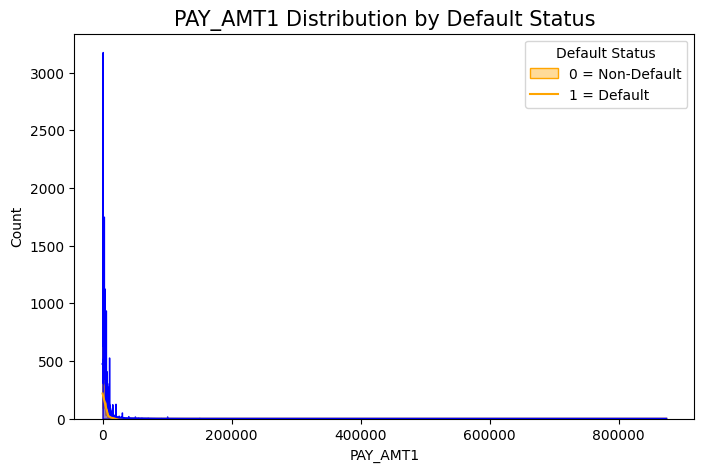

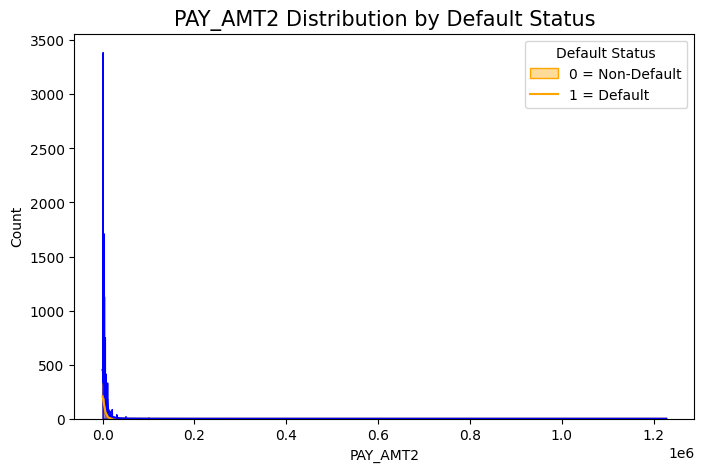

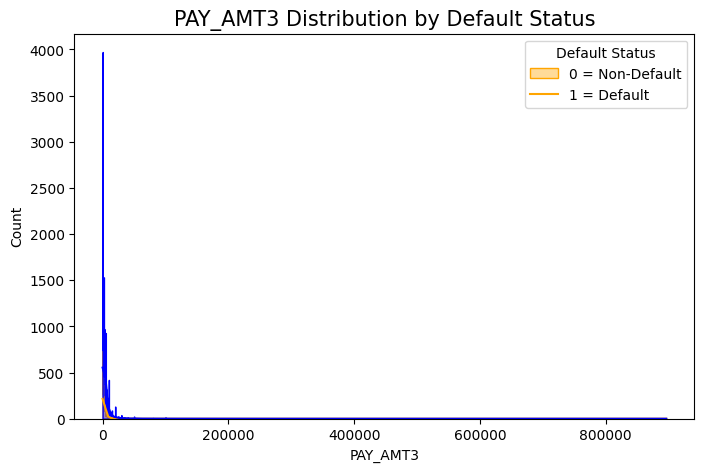

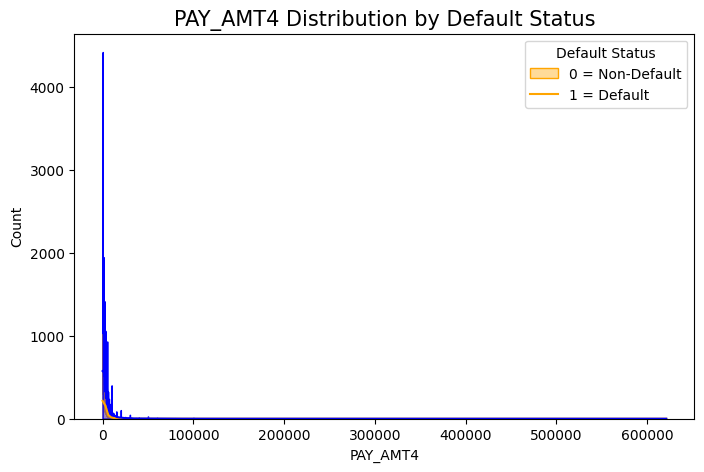

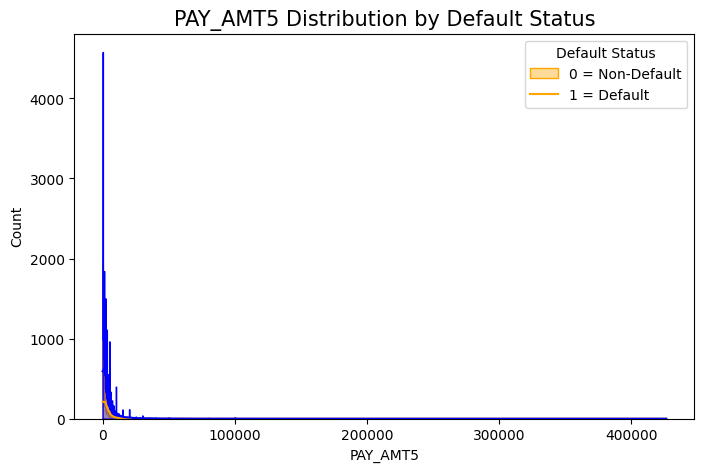

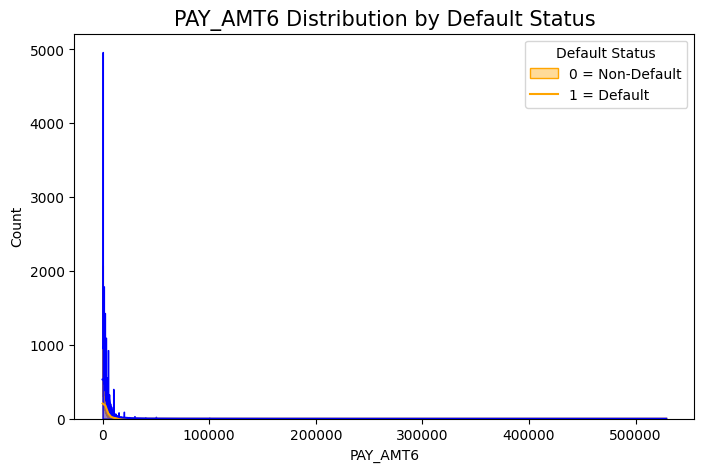

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/sample_data/final_credit_clean.csv')

# 2️⃣ PAY_AMT 변수 목록
pay_vars = [f'PAY_AMT{i}' for i in range(1, 7)]
target = 'default payment next month'

# 3️⃣ PAY_AMT1~6 히스토그램 + KDE
for col in pay_vars:
    plt.figure(figsize=(8,5))
    sns.histplot(
        data=df,
        x=col,
        hue=target,
        kde=True,
        palette={0: 'blue', 1: 'orange'},
        alpha=0.4,
        element='step'
    )

    # 범례 한글+영어로 설정
    plt.legend(
        title="Default Status",
        labels=["0 = Non-Default", "1 = Default"]
    )

    plt.title(f'{col} Distribution by Default Status', fontsize=15)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


2. PAY_AMT1~6(지불금액 6개 구간별 연체율(bin-wise default rate)


=== PAY_AMT1 구간별 연체율(%) ===
PAY_AMT1_bin
(-0.001, 1067.0]      33.071989
(1067.0, 2200.0]      22.335891
(2200.0, 5041.0]      20.572246
(5041.0, 873552.0]    14.088122
Name: default payment next month, dtype: float64


/tmp/ipython-input-1680492855.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(f'{col}_bin')[target].mean() * 100


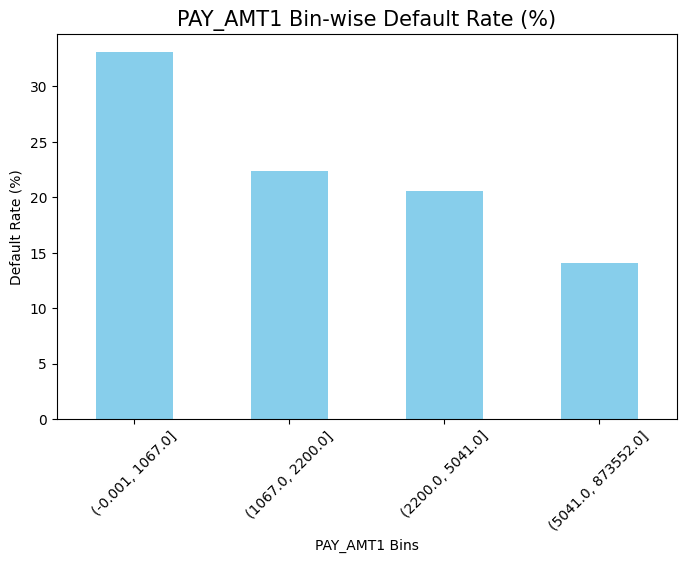

/tmp/ipython-input-1680492855.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(f'{col}_bin')[target].mean() * 100



=== PAY_AMT2 구간별 연체율(%) ===
PAY_AMT2_bin
(-0.001, 1000.0]       31.601316
(1000.0, 2083.5]       23.269973
(2083.5, 5000.0]       20.842076
(5000.0, 1227082.0]    13.897369
Name: default payment next month, dtype: float64


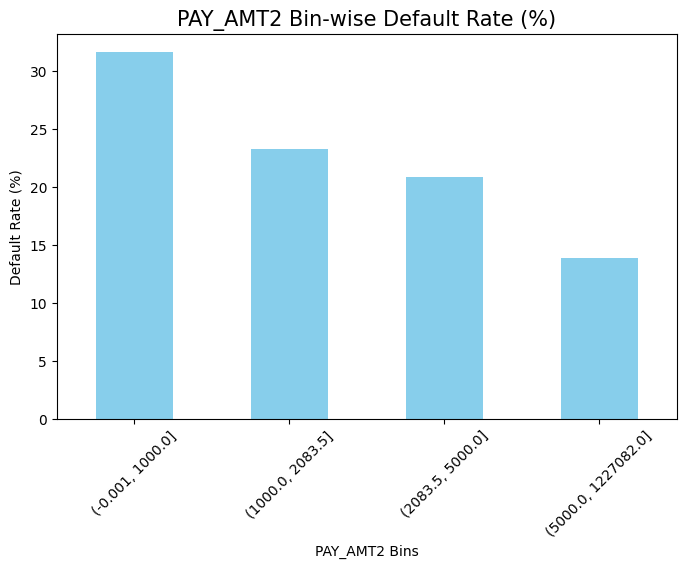

/tmp/ipython-input-1680492855.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(f'{col}_bin')[target].mean() * 100



=== PAY_AMT3 구간별 연체율(%) ===
PAY_AMT3_bin
(-0.001, 500.0]       31.452870
(500.0, 1953.0]       23.160763
(1953.0, 4647.5]      20.886798
(4647.5, 896040.0]    14.528087
Name: default payment next month, dtype: float64


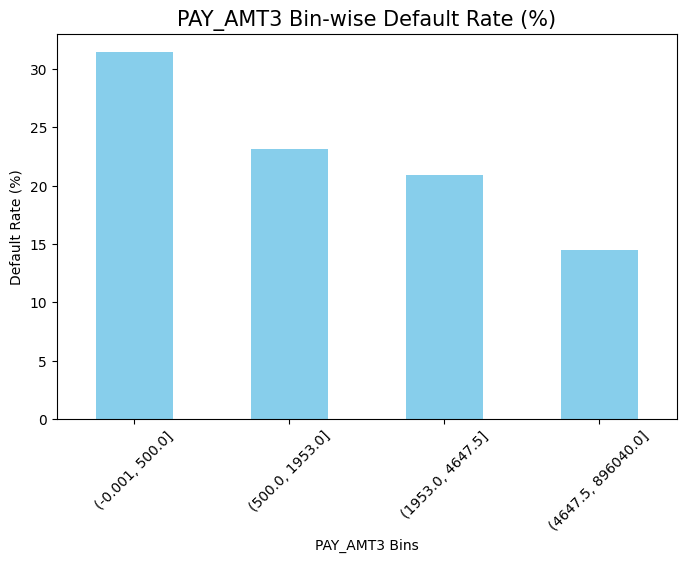

/tmp/ipython-input-1680492855.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(f'{col}_bin')[target].mean() * 100



=== PAY_AMT4 구간별 연체율(%) ===
PAY_AMT4_bin
(-0.001, 366.75]      30.239521
(366.75, 1561.5]      24.194468
(1561.5, 4100.0]      20.347183
(4100.0, 621000.0]    15.285714
Name: default payment next month, dtype: float64


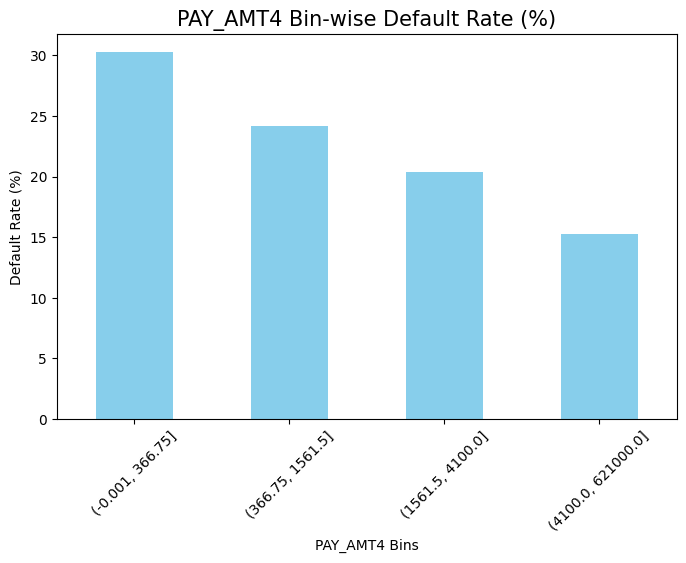

/tmp/ipython-input-1680492855.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(f'{col}_bin')[target].mean() * 100



=== PAY_AMT5 구간별 연체율(%) ===
PAY_AMT5_bin
(-0.001, 346.0]        29.485535
(346.0, 1600.0]        24.176604
(1600.0, 4142.75]      20.956883
(4142.75, 426529.0]    15.440547
Name: default payment next month, dtype: float64


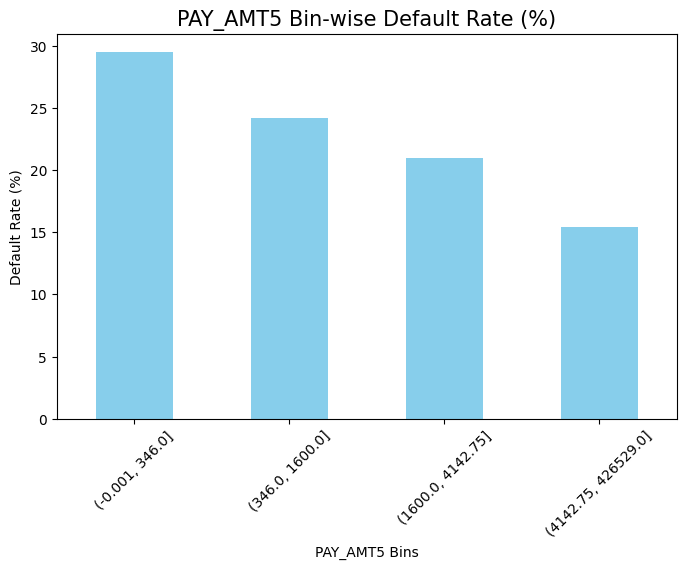


=== PAY_AMT6 구간별 연체율(%) ===
PAY_AMT6_bin
(-0.001, 236.0]       29.493942
(236.0, 1500.0]       24.725823
(1500.0, 4006.0]      20.890411
(4006.0, 528666.0]    14.960068
Name: default payment next month, dtype: float64


/tmp/ipython-input-1680492855.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(f'{col}_bin')[target].mean() * 100


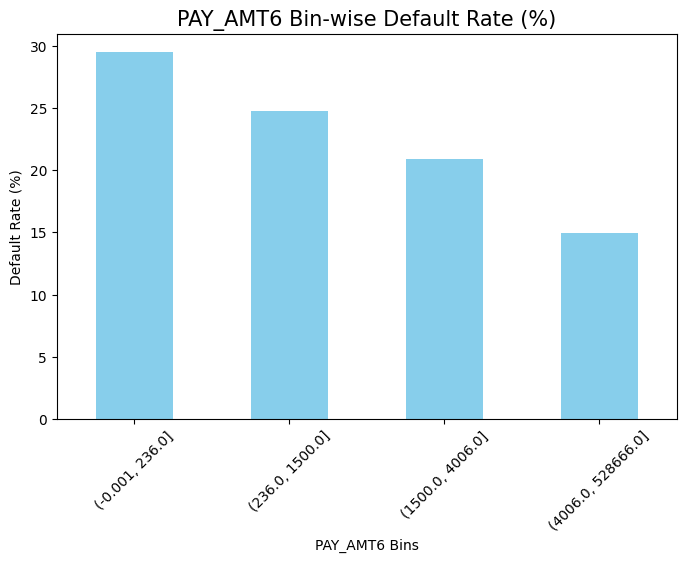

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/sample_data/final_credit_clean.csv')

# 2️⃣ PAY_AMT 변수 목록
pay_vars = [f'PAY_AMT{i}' for i in range(1, 7)]
target = 'default payment next month'

# 3️⃣ 변수별 연체율(bin-wise default rate)
for col in pay_vars:
    # 분위수 기반 구간 나누기 (4분위)
    df[f'{col}_bin'] = pd.qcut(df[col], q=4, duplicates='drop')

    # 구간별 연체율(%)
    rate = df.groupby(f'{col}_bin')[target].mean() * 100

    print(f"\n=== {col} 구간별 연체율(%) ===")
    print(rate)

    # 시각화
    plt.figure(figsize=(8,5))
    rate.plot(kind='bar', color='skyblue')
    plt.title(f'{col} Bin-wise Default Rate (%)', fontsize=15)
    plt.ylabel('Default Rate (%)')
    plt.xlabel(f'{col} Bins')
    plt.xticks(rotation=45)
    plt.show()

수치형 변수들 간 상관관계 분석 - 변수들 간의 선형 관계 파악

1. 수치형 변수 자동 추출 + 상관계수 계산 + Heatmap

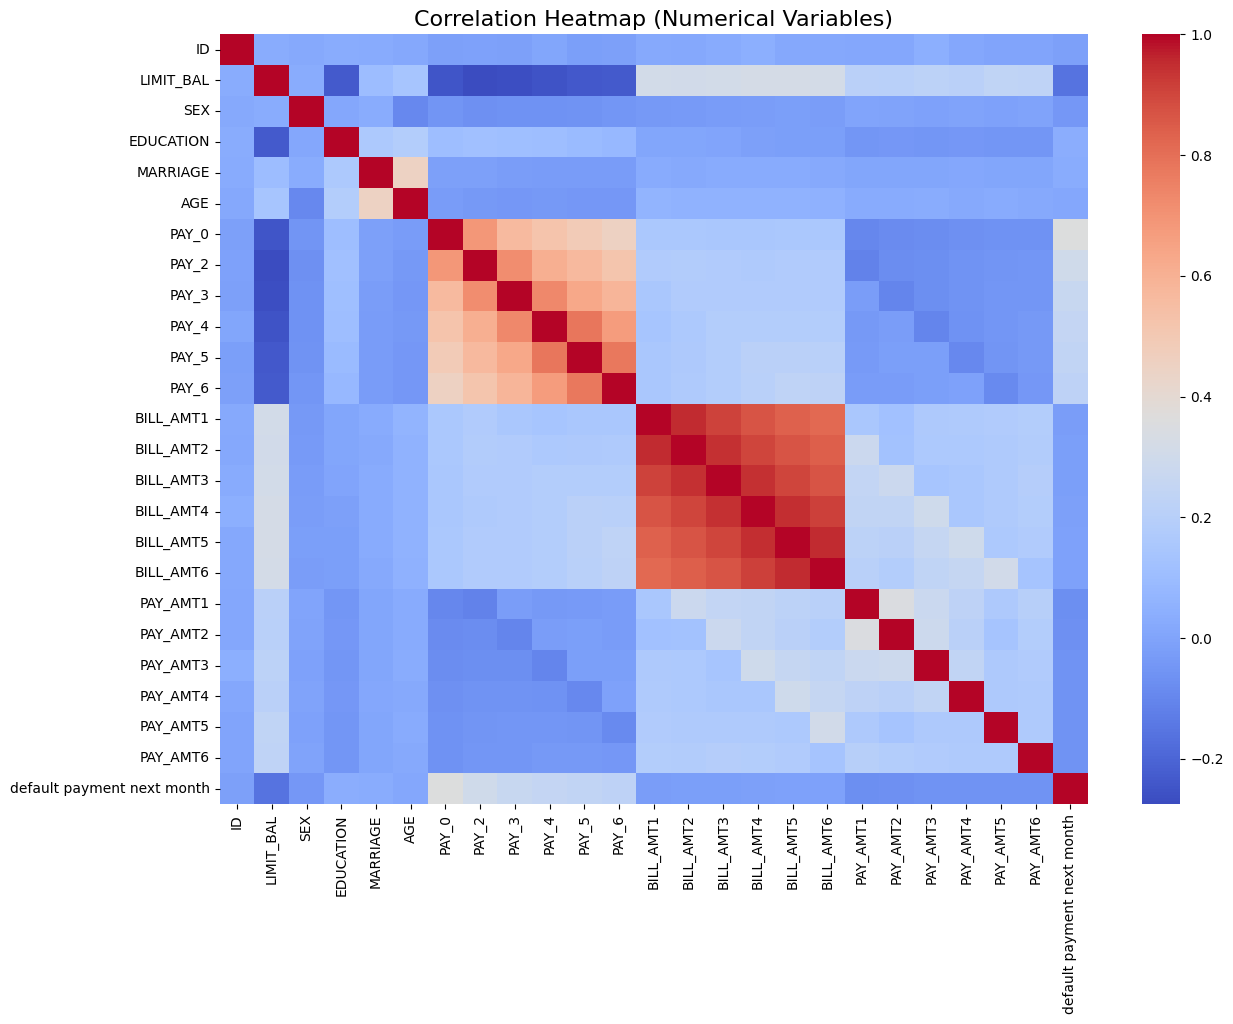

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/sample_data/final_credit_clean.csv')

# 2️⃣ 수치형 변수 자동 추출
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 3️⃣ 상관계수(correlation) 계산
corr = numeric_df.corr()

# 4️⃣ Heatmap 시각화
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (Numerical Variables)', fontsize=16)
plt.show()


2. 다음달 연체 여부(target)와의 상관관계만 따로 보기

In [ ]:
target = 'default payment next month'

target_corr = corr[target].sort_values(ascending=False)

print("📌 다음달 연체 여부와 관련 높은 수치형 변수 상관계수")
print(target_corr)


📌 다음달 연체 여부와 관련 높은 수치형 변수 상관계수
default payment next month    1.000000
PAY_0                         0.360054
PAY_2                         0.300238
PAY_3                         0.267471
PAY_4                         0.252061
PAY_5                         0.241745
PAY_6                         0.224245
EDUCATION                     0.036543
MARRIAGE                      0.029047
AGE                           0.011829
BILL_AMT6                    -0.009022
BILL_AMT5                    -0.010004
ID                           -0.013563
BILL_AMT4                    -0.014054
BILL_AMT3                    -0.017401
BILL_AMT2                    -0.019257
BILL_AMT1                    -0.025244
SEX                          -0.043176
PAY_AMT6                     -0.057762
PAY_AMT4                     -0.058120
PAY_AMT3                     -0.058132
PAY_AMT5                     -0.060892
PAY_AMT2                     -0.066511
PAY_AMT1                     -0.074987
LIMIT_BAL                    -0.1